<a href="https://colab.research.google.com/github/CaptainLight5/Human-Activity-Recognition-/blob/main/Human_Activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, GRU, ConvLSTM2D, Dense, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical


In [29]:
# 1. Data Loading
def load_data():
    train_df = pd.read_csv('/content/train.csv')
    test_df = pd.read_csv('/content/test.csv')
    return train_df, test_df

train_df, test_df = load_data()

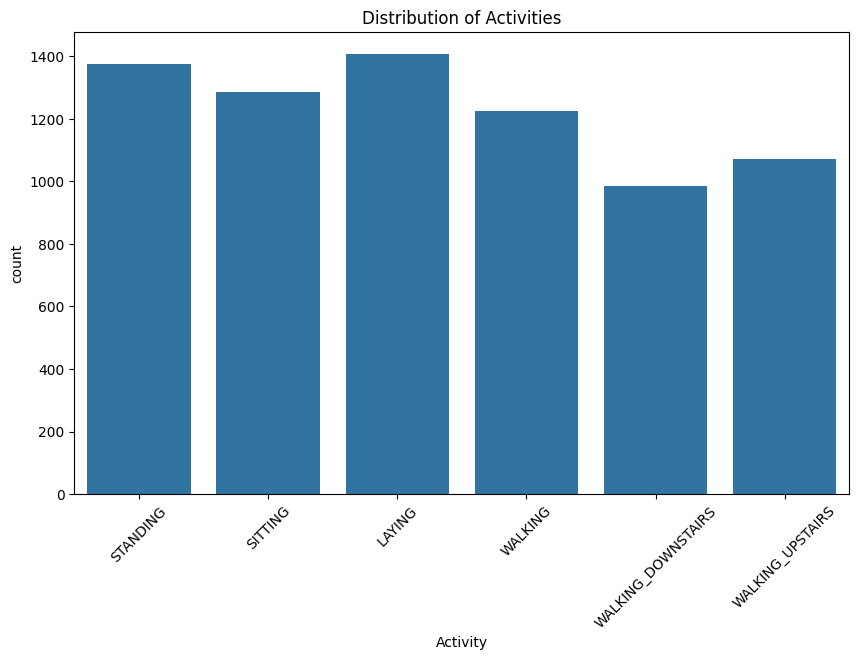

In [32]:
# Exploratory Data Analysis (EDA)
# EDA 1: Distribution of Activities
def plot_activity_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Activity', data=df)
    plt.title('Distribution of Activities')
    plt.xticks(rotation=45)
    plt.show()

plot_activity_distribution(train_df)

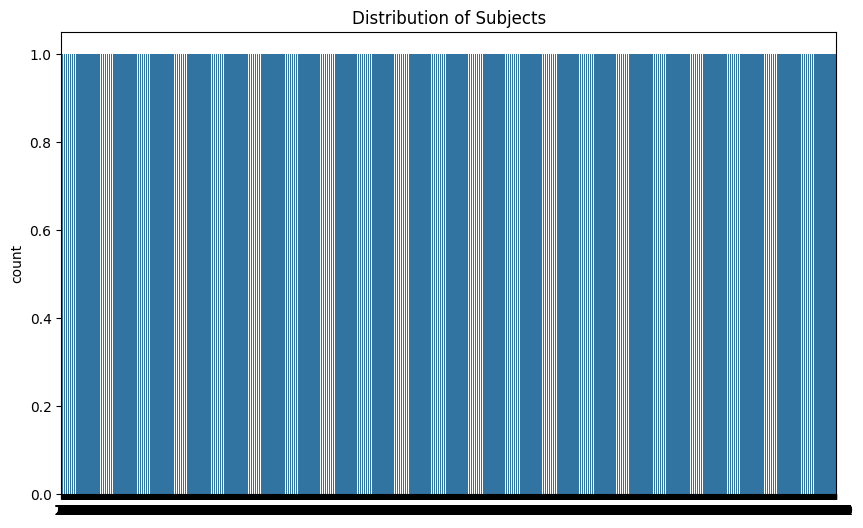

In [33]:
# EDA 2: Distribution of Subjects
def plot_subject_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(df['subject'])
    plt.title('Distribution of Subjects')
    plt.show()

plot_subject_distribution(train_df)


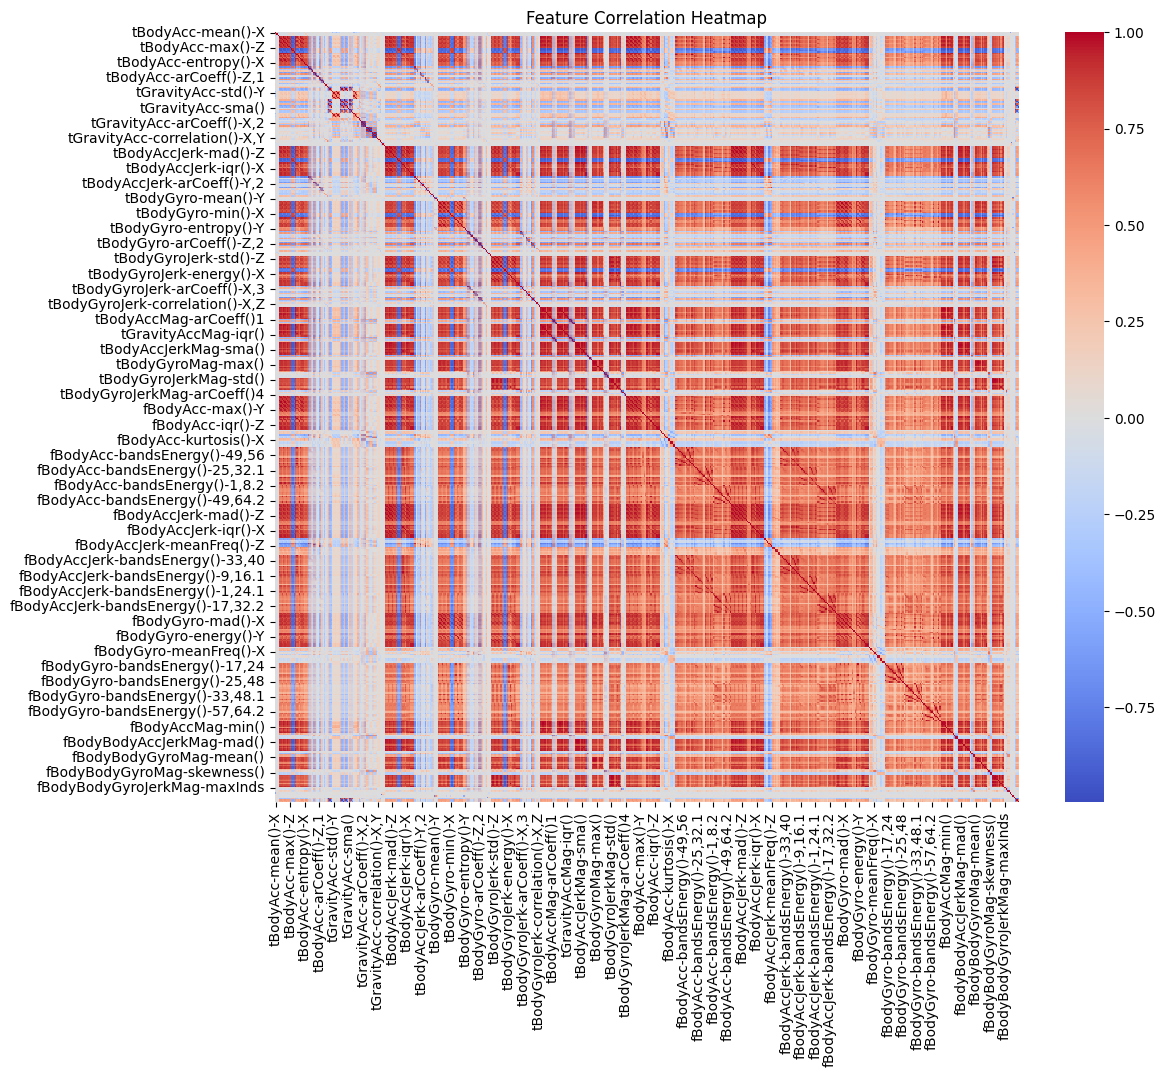

In [34]:
# EDA 3: Correlation Heatmap
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 10))
    corr = df.drop(['Activity', 'subject'], axis=1).corr()
    sns.heatmap(corr, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(train_df)

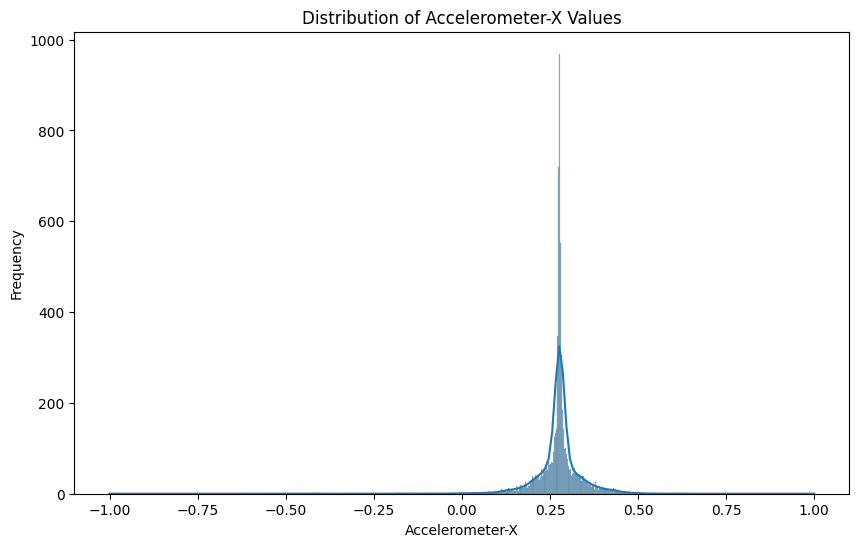

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [38]:
# EDA 4: Distribution of Accelerometer-X Values
plt.figure(figsize=(10, 6))w
sns.histplot(train_df['tBodyAcc-mean()-X'], kde=True)
plt.title('Distribution of Accelerometer-X Values')
plt.xlabel('Accelerometer-X')
plt.ylabel('Frequency')
plt.show()
print(train_df.columns)

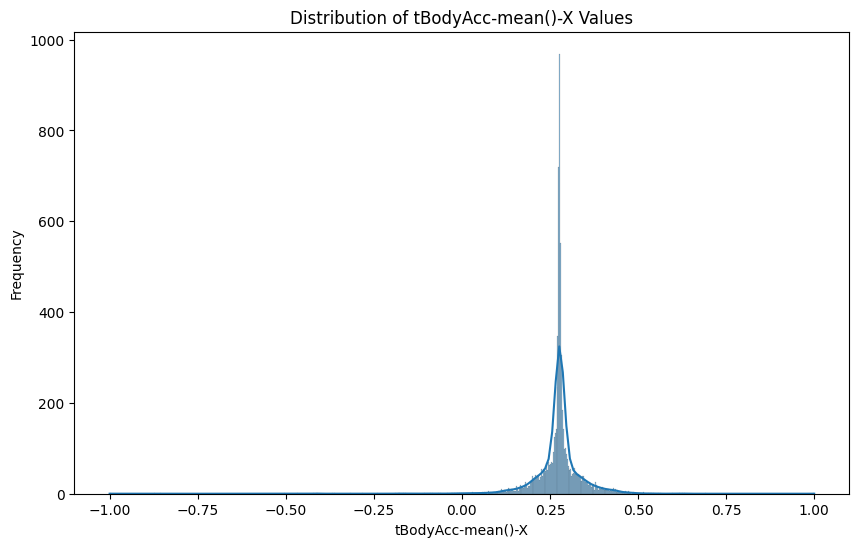

In [40]:
# EDA 5: Distribution of a Numerical Feature 'tBodyAcc-mean()-X'
def plot_feature_distribution(df, feature_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature_name], kde=True)
    plt.title(f'Distribution of {feature_name} Values')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

plot_feature_distribution(train_df, 'tBodyAcc-mean()-X')

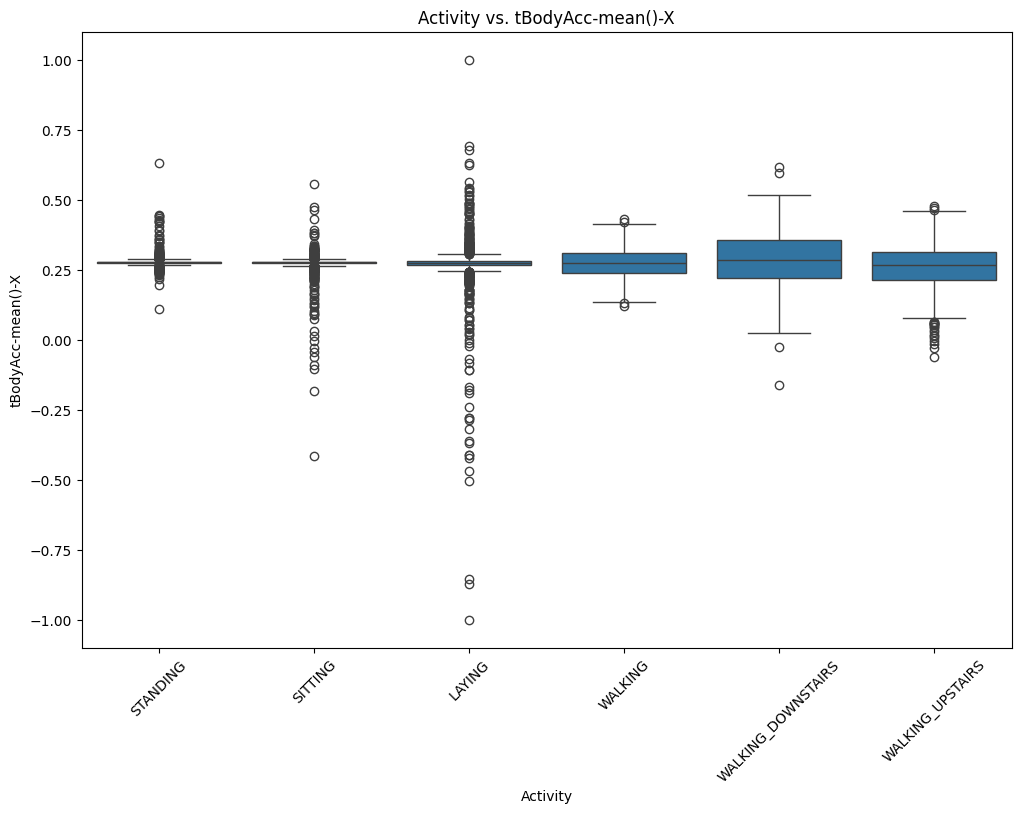

In [42]:
 #EDA 6: Box Plots for Activity vs. a Numerical Feature
def plot_activity_vs_feature(df, feature_name):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Activity', y=feature_name, data=df)
    plt.title(f'Activity vs. {feature_name}')
    plt.xticks(rotation=45)
    plt.show()

plot_activity_vs_feature(train_df, 'tBodyAcc-mean()-X')  # Replace with the desired featur

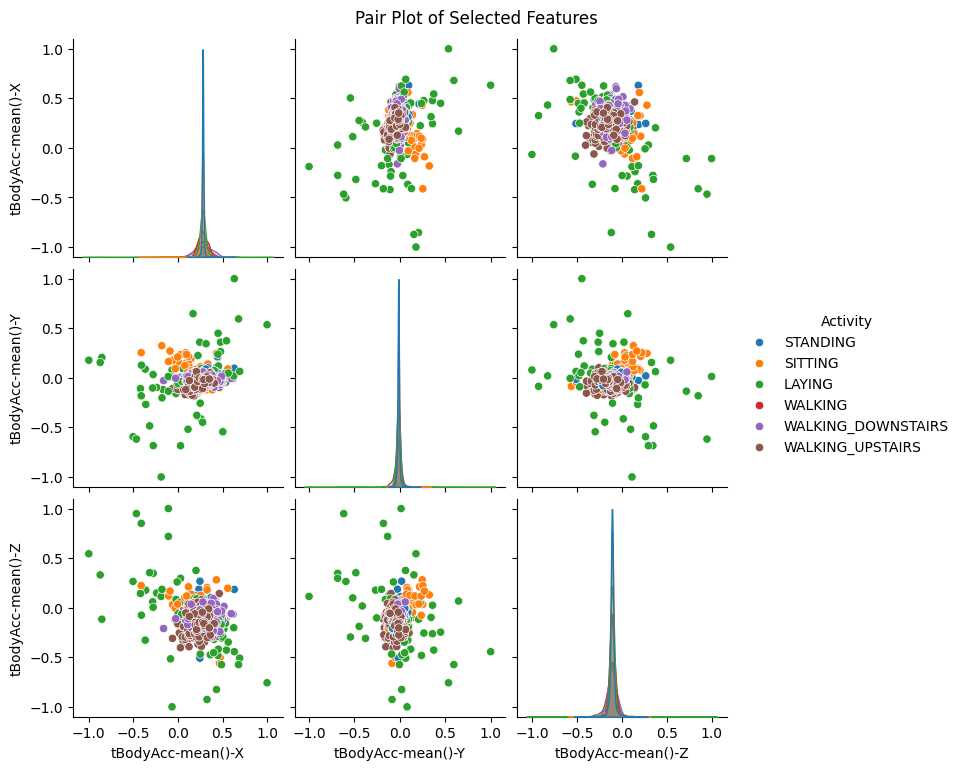

In [43]:

# EDA 7: Pair Plot for Selected Features
def plot_pairplot(df, features):
    sns.pairplot(df[features + ['Activity']], hue='Activity', diag_kind='kde')
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.show()

selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
plot_pairplot(train_df, selected_features)


In [50]:
# 3. This is the Data Preprocessing Stage
def preprocess_data(train_df, test_df):
    X_train = train_df.drop(['Activity', 'subject'], axis=1)
    y_train = train_df['Activity']
    X_test = test_df.drop(['Activity', 'subject'], axis=1)
    y_test = test_df['Activity']

    # This is to encode the labels
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

     # This is the normalization process
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    return X_train, X_test, y_train, y_test, le

X_train, X_test, y_train, y_test, le = preprocess_data(train_df, test_df)

In [76]:

!pip install tensorflow
#  This is the Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, GRU, ConvLSTM2D

#  This creates the CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Dropout(0.5),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#  This creates LSTM the Model
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(100),
        Dropout(0.5),
        Dense(100, activation='relu'),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#  This create the GRU the Model
def create_gru_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(100),
        Dropout(0.5),
        Dense(100, activation='relu'),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [77]:
# 7. Model Evaluation
def evaluate_model(model, X_test, y_test, le):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')

    return y_test_classes, y_pred_classes

# 8. Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, le):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#9. ROC-AUC Curve
def plot_roc_auc(y_test, y_pred_probs, le):
    """Plots ROC-AUC curve for each class with activity names."""

    n_classes = y_test.shape[1]  # this handles the Number of classes

    plt.figure(figsize=(10, 7))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{le.classes_[i]} (area = {roc_auc:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve for Each Activity')
    plt.legend(loc='lower right')
    plt.show()

Training CNN Model
Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8393 - loss: 0.4074
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9700 - loss: 0.0864
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9677 - loss: 0.0816
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9709 - loss: 0.0776
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9814 - loss: 0.0509
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9812 - loss: 0.0560
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9850 - loss: 0.0395
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9828 - loss: 0.0423
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9874 - loss: 0.0335
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9922 - loss: 0.0215
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Accuracy: 0.9569053274516457
Precision: 0.9581919725986988
F1

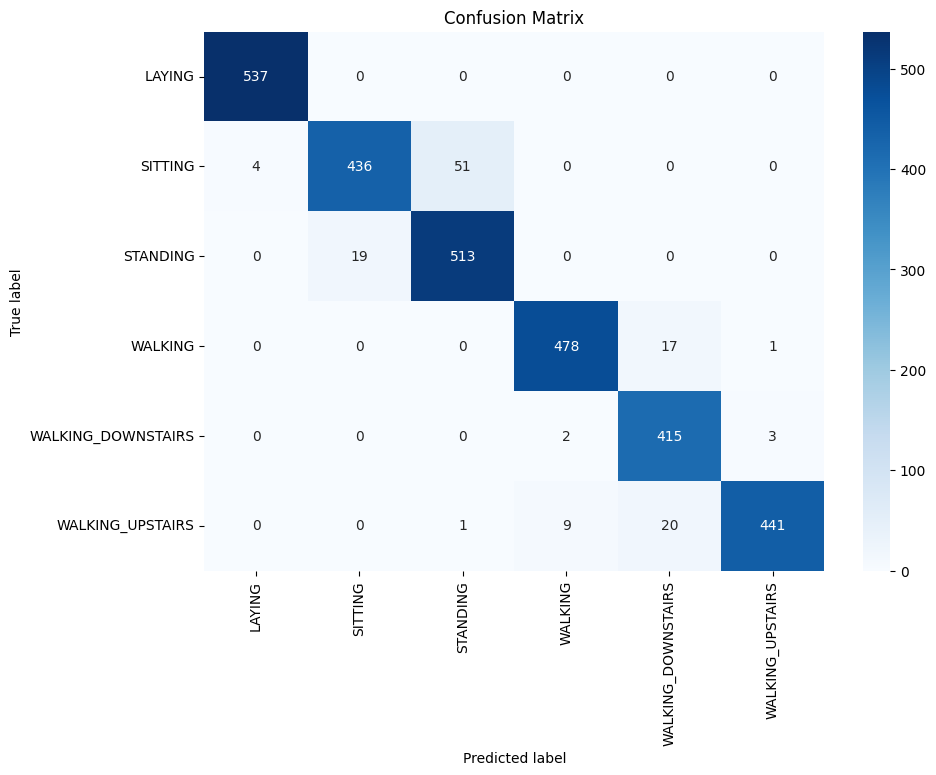

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


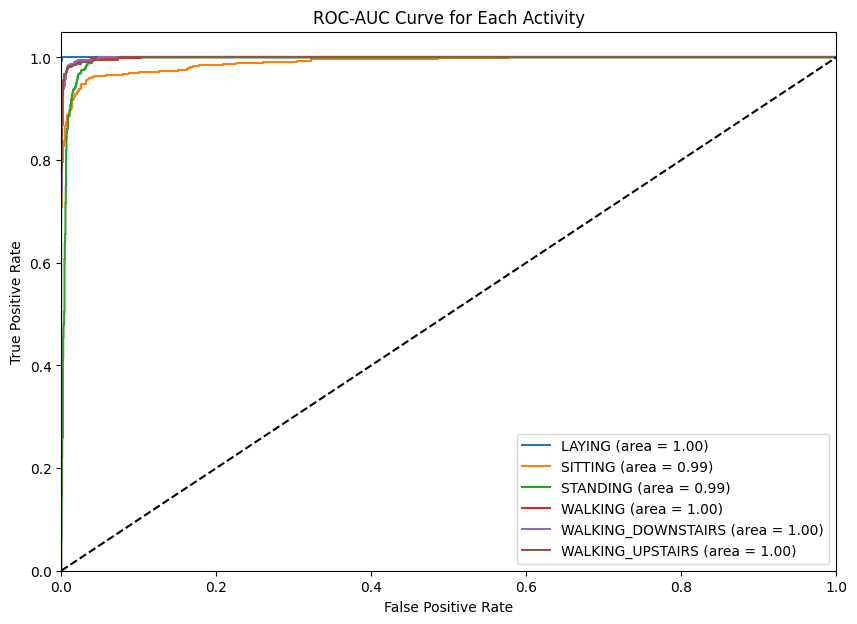

Training LSTM Model
Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 72s 306ms/step - accuracy: 0.4500 - loss: 1.2316
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 306ms/step - accuracy: 0.6570 - loss: 0.7704
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 82s 306ms/step - accuracy: 0.6962 - loss: 0.6496
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 305ms/step - accuracy: 0.7151 - loss: 0.6326
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 305ms/step - accuracy: 0.7307 - loss: 0.5865
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 306ms/step - accuracy: 0.7620 - loss: 0.5484
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 82s 305ms/step - accuracy: 0.7948 - loss: 0.4754
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 304ms/step - accuracy: 0.8283 - loss: 0.4204
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 82s 305ms/step - accuracy: 0.8542 - loss: 0.3495
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 304ms/step - accuracy: 0.8714 - loss: 0.3371
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step
Accuracy: 0.8306752629793009
Precision: 0.83302

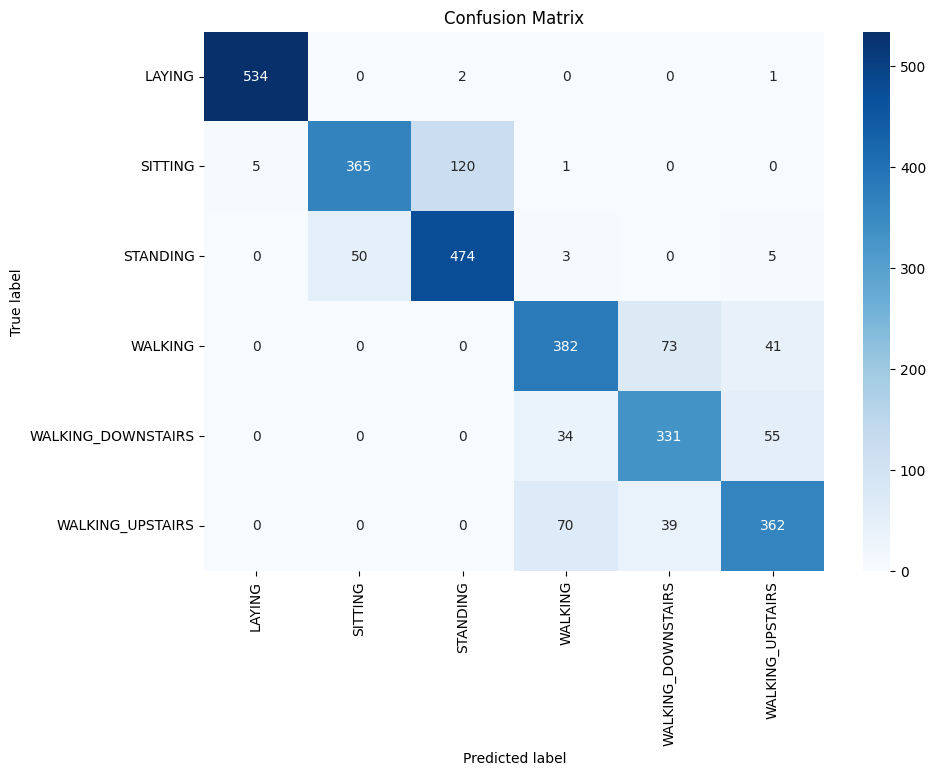

93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step


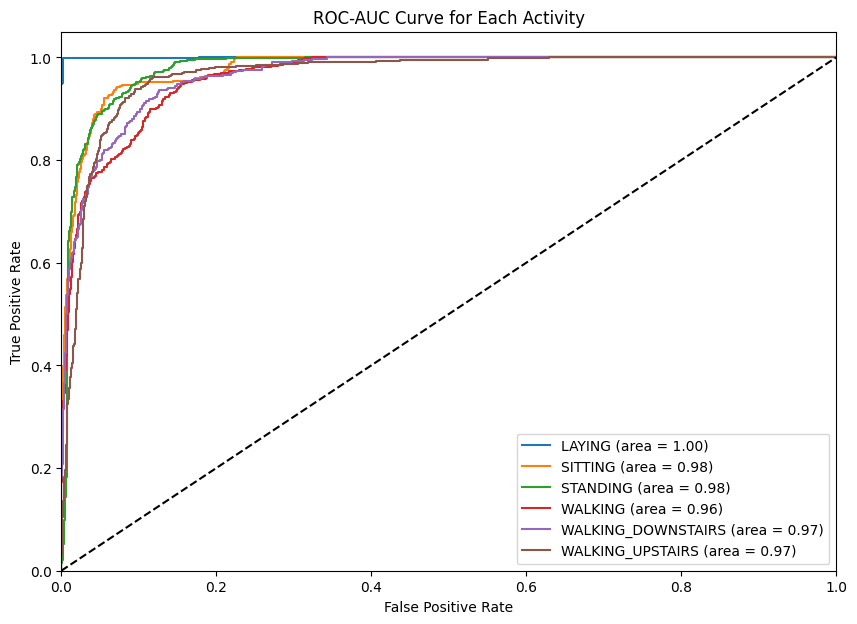

Training GRU Model
Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 92s 391ms/step - accuracy: 0.4619 - loss: 1.2679
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 90s 390ms/step - accuracy: 0.7143 - loss: 0.6442
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 143s 395ms/step - accuracy: 0.7777 - loss: 0.5013
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 90s 390ms/step - accuracy: 0.8416 - loss: 0.3933
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 91s 396ms/step - accuracy: 0.8622 - loss: 0.3476
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 141s 391ms/step - accuracy: 0.8702 - loss: 0.3239
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 142s 393ms/step - accuracy: 0.8770 - loss: 0.3055
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 142s 394ms/step - accuracy: 0.8871 - loss: 0.2835
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 91s 397ms/step - accuracy: 0.8875 - loss: 0.2805
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 141s 393ms/step - accuracy: 0.8930 - loss: 0.2701
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step
Accuracy: 0.8347472005429251
Precision: 0.837

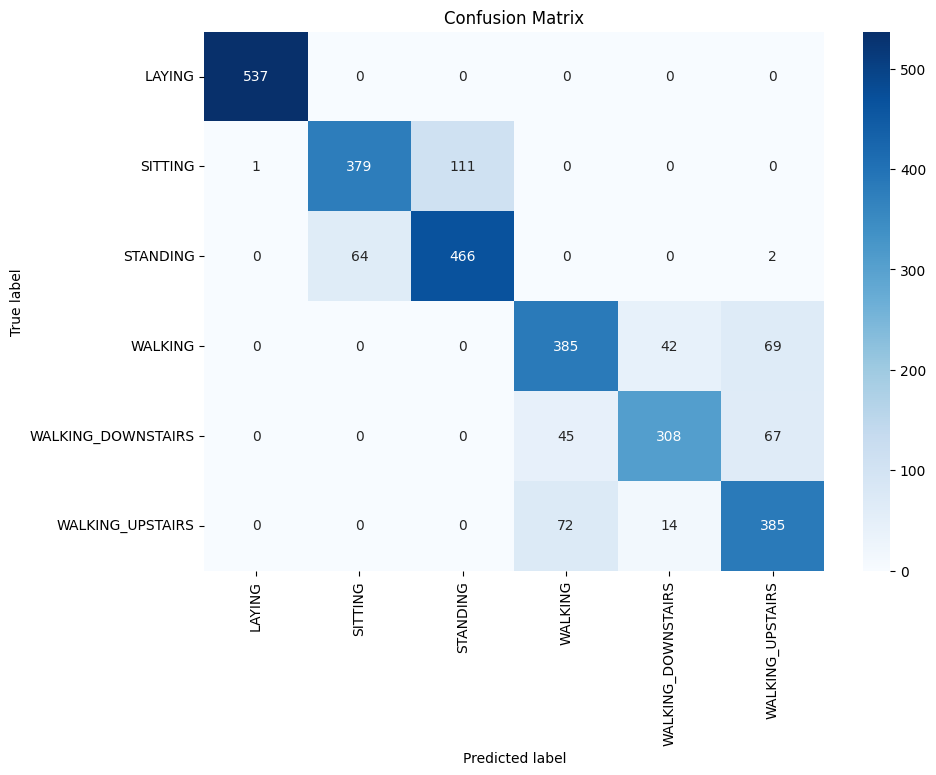

93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step


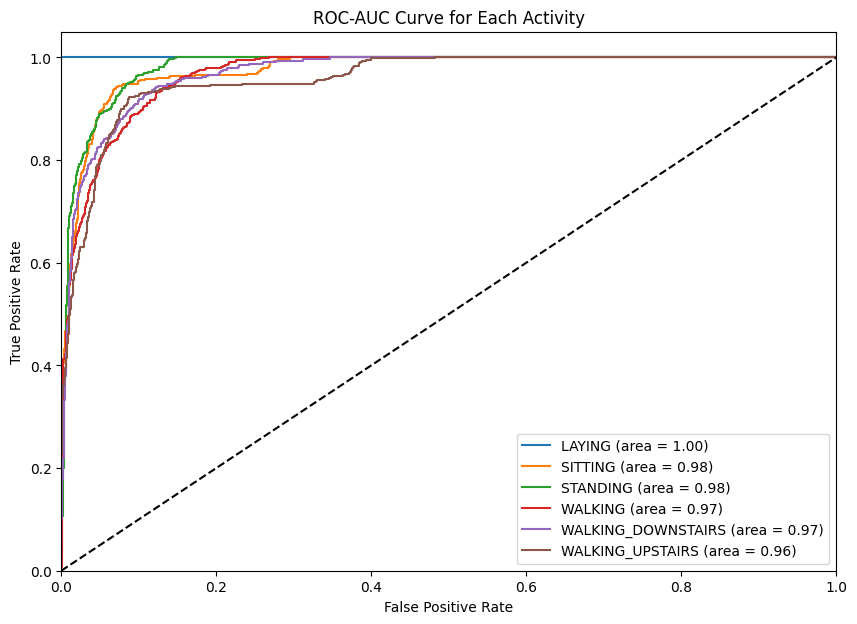

In [78]:
# 10. Comparison of Models
def compare_models(X_train, y_train, X_test, y_test):
    input_shape = (X_train.shape[1], X_train.shape[2])

    # CNN
    print("Training CNN Model")
    cnn_model = create_cnn_model(input_shape)
    cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    y_test_classes, y_pred_classes = evaluate_model(cnn_model, X_test, y_test, le)
    plot_confusion_matrix(y_test_classes, y_pred_classes, le)
    plot_roc_auc(y_test, cnn_model.predict(X_test), le) # this passes the LabelEncoder object 'le'

    # LSTM
    print("Training LSTM Model")
    lstm_model = create_lstm_model(input_shape)
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    y_test_classes, y_pred_classes = evaluate_model(lstm_model, X_test, y_test, le)
    plot_confusion_matrix(y_test_classes, y_pred_classes, le)
    plot_roc_auc(y_test, lstm_model.predict(X_test), le)

    # GRU
    print("Training GRU Model")
    gru_model = create_gru_model(input_shape)
    gru_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    y_test_classes, y_pred_classes = evaluate_model(gru_model, X_test, y_test, le)
    plot_confusion_matrix(y_test_classes, y_pred_classes, le)
    plot_roc_auc(y_test, gru_model.predict(X_test), le)


compare_models(X_train, y_train, X_test, y_test)

